# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

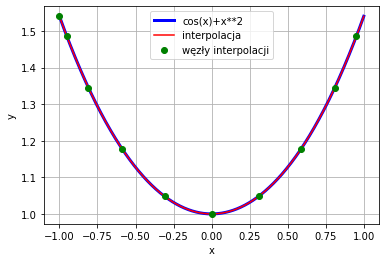

In [3]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()



C:\Users\tomis\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
C:\Users\tomis\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
C:\Users\tomis\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:641: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
C:\Users\tomis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


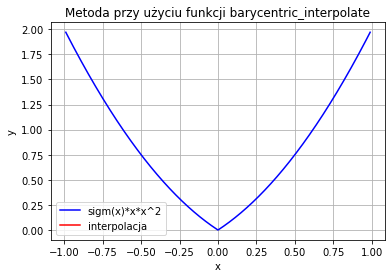

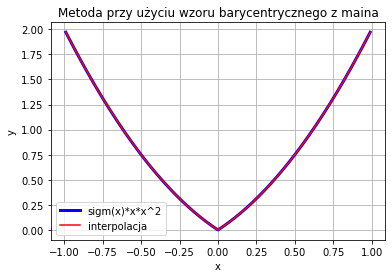

Interpolacja rzędu:  10
7.11 ms ± 1.03 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
Interpolacja rzędu:  100
16.5 ms ± 1.53 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
Interpolacja rzędu:  1000
105 ms ± 6.3 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
Interpolacja rzędu:  10000
1.34 s ± 108 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
Interpolacja rzędu:  100000
15.5 s ± 168 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [4]:
x = np.linspace(-0.99, 0.99, 1000)
interpolation_nodes_number = 10 ** 3
xch = np.cos(np.linspace(1, interpolation_nodes_number, interpolation_nodes_number) * np.pi / interpolation_nodes_number)

yimp = barycentric_interpolate(xch, main.f1(xch), x)

plt.plot(x, main.f1(x), 'b', label = 'sigm(x)*x*x^2')
plt.plot(x, yimp, 'r', label = 'interpolacja')
#plt.plot(xch, main.f1(xch),'go', label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Metoda przy użyciu funkcji barycentric_interpolate')
plt.grid()
plt.legend()
plt.show()

x = np.linspace(-0.99, 0.99, 1000)
chebyshev_nodes = main.chebyshev_nodes(1000)
bar_czeb_weights = main.bar_czeb_weights(1000)

yimp = main.barycentric_inte(chebyshev_nodes, main.f1(chebyshev_nodes), bar_czeb_weights, x)

plt.plot(x, main.f1(x), 'b', linewidth=3, label = 'sigm(x)*x*x^2')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Metoda przy użyciu wzoru barycentrycznego z maina')
plt.grid()
plt.legend()
plt.show()


for n in [10, 100, 1000, 10000, 100000]:
    print('Interpolacja rzędu: ', n)
    nodes = main.chebyshev_nodes(n)
    weights = main.bar_czeb_weights(n)
    timeit = %timeit -r 10 -n 10 -o main.barycentric_inte(nodes, main.f1(nodes), weights, x)


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [12]:
x = np.linspace(-0.99, 0.99, 1000)
for n in [10, 100, 1000, 10000, 100000]:
    print('Interpolacja rzędu: ', n)
    nodes = main.chebyshev_nodes(n)
    weights = main.bar_czeb_weights(n)
    y_norm = main.barycentric_inte(nodes, main.f1(nodes), weights, x)

    print('Norm L_inf = ', main.L_inf(main.f1(x), y_norm))

Interpolacja rzędu:  10
Norm L_inf =  0.05921959662241706
Interpolacja rzędu:  100
Norm L_inf =  0.00596754139064338
Interpolacja rzędu:  1000
Norm L_inf =  0.0005721637697345603
Interpolacja rzędu:  10000
Norm L_inf =  7.075074843119382e-06
Interpolacja rzędu:  100000
Norm L_inf =  1.5690119974055491e-07


***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

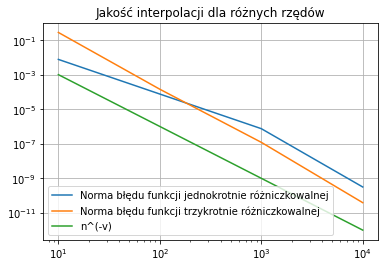

In [15]:
n1 = [10, 100, 1000, 10000]
x = np.linspace(-0.99, 0.99, 1000)
normf2 = []
normf3 = []
comparison = []

for n in n1:
    nodes = main.chebyshev_nodes(n)
    weights = main.bar_czeb_weights(n)
    
    yf2 = main.barycentric_inte(nodes, main.f2(nodes), weights, x)
    yf3 = main.barycentric_inte(nodes, main.f3(nodes), weights, x)
    
    nf2 = main.L_inf(main.f2(x), yf2)
    nf3 = main.L_inf(main.f3(x), yf3)

    normf2.append(nf2)
    normf3.append(nf3)
    comparison.append(1 / (n**3))

plt.loglog(n1, normf2, label='Norma błędu funkcji jednokrotnie różniczkowalnej')
plt.loglog(n1, normf3, label='Norma błędu funkcji trzykrotnie różniczkowalnej')
plt.loglog(n1, comparison, label='n^(-v)')
plt.title('Jakość interpolacji dla różnych rzędów')
plt.legend()
plt.grid()
plt.show()

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

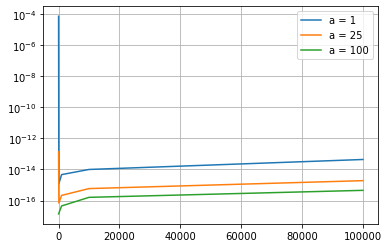

In [14]:
n1 = [10, 100, 1000, 10000, 100000]
x = np.linspace(-0.99, 0.99, 1000)
normfa1 = []
normfa25 = []
normfa100 = []

for n in n1:
    nodes = main.chebyshev_nodes(n)
    weights = main.bar_czeb_weights(n)
    yfa1 = main.barycentric_inte(nodes, main.fa1(nodes), weights, x)
    yfa25 = main.barycentric_inte(nodes, main.fa25(nodes), weights, x)
    yfa100 = main.barycentric_inte(nodes, main.fa100(nodes), weights, x)

    nfa1 = main.L_inf(main.fa1(x), yfa1)
    normfa1.append(nfa1)
    nfa25 = main.L_inf(main.fa25(x), yfa25)
    normfa25.append(nfa25)
    nfa100 = main.L_inf(main.fa100(x), yfa100)
    normfa100.append(nfa100)

plt.semilogy(n1, normfa1, label='a = 1')
plt.semilogy(n1, normfa25, label='a = 25')
plt.semilogy(n1, normfa100, label='a = 100')
plt.legend()
plt.grid()
plt.show()

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Wartości różnią się, bo dla n nieparzystych interpolacja przecina funkcję signum w punkcie (0,0) przez co błąd niezależny nie przekracza 0.5, dla n parzystych wartość błędu zbliża się do 1.

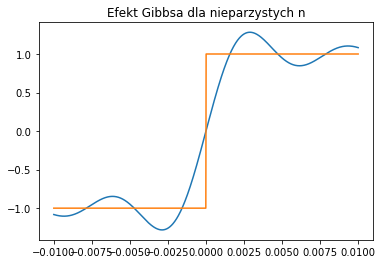

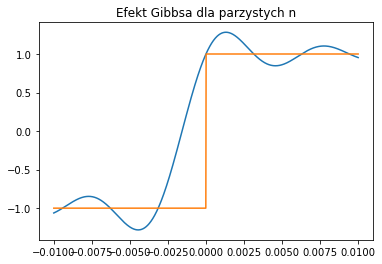

In [7]:
gibbs = lambda x: np.sign(x)

x = np.linspace(-0.01, 0.01, 1000)
even_nodds = main.chebyshev_nodes(999)
even_weights = main.bar_czeb_weights(999)
y1 = main.barycentric_inte(even_nodds, gibbs(even_nodds), even_weights, x)

odd_nodds = main.chebyshev_nodes(1000)
odd_weights = main.bar_czeb_weights(1000)
y2 = main.barycentric_inte(odd_nodds, gibbs(odd_nodds), odd_weights, x)

plt.plot(x, y1)
plt.plot(x, gibbs(x))
plt.title('Efekt Gibbsa dla nieparzystych n')
plt.show()

plt.plot(x, y2)
plt.plot(x, gibbs(x))
plt.title('Efekt Gibbsa dla parzystych n')
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

Zapoznałem się z definicją interpolacji oraz sposobami wyznaczania funkcji interpolacyjnej. Nauczyłem się wyznaczać wektory zawierające węzły Czebyszewa oraz wagi tych węzłów. Napisałem logikę funckji, która przeprowadza interpolację metodą barycentryczną dla wyznaczonych węzłów i wag. Przeanalizowałem również jakość interpolacji w zależności od jej rzędu oraz dowiedziałem się o efekcie Gibbsa.